<a href="https://colab.research.google.com/github/RAGISHIVANAND/vehicle-number-plate-recognition/blob/main/VEHICLE_NUMBER_PLATE_DETECTION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 0. Install and Import Dependencies

# `***1. !pip install easyocr***`

***purpose***: Installs the easyocr library, which enables Optical Character Recognition (OCR) in your Python environment.

***Functionality***: Provides tools for performing accurate and user-friendly text recognition from diverse image sources,
including:
1.Local files
2.Webcams
3.Other image input streams

***Supported Languages***: Handles over 80 languages and writing systems, expanding its versatility.

***Pre-trained Models***: Offers a variety of pre-trained models optimized for different use cases and languages, simplifying deployment.

***Installation Note***:
1.The !pip syntax is typically used in Jupyter notebooks or other environments where you can directly execute shell commands.
2.If you're working in a different setup, use pip install easyocr from your command line to install the library.


# `***2. !pip install imutils***`

***Purpose***: Installs the imutils library, which provides a collection of useful utility functions for image processing tasks in Python.

***Functionality***: Offers convenience functions for
                    operations like:
1Grayscale conversion
2Edge detection
3Region of interest selection
4Image manipulations (resizing, rotating, cropping)And more

***Relationship to OpenCV***:
While not officially part of OpenCV, it builds upon it and streamlines common tasks, often enhancing usability:.

***Installation Note***: Similar to easyocr, use pip install imutils from your command line if needed.

# `***Potential Limitations and Alternatives:***`

***easyocr***:
1 May require additional dependencies like PyTorch or Tesseract
2 May have accuracy limitations depending on image quality and text complexity
3 Consider exploring other advanced OCR libraries for specific needs like pytesseract or PaddleOCR

***imutils***:
1.Can be superseded by functionalities available in core libraries like OpenCV
2.Consider using OpenCV directly for more control and deeper customizations
I hope this comprehensive explanation helps you understand these libraries and their potential uses in your Python projects. If you have further questions or specific context to share, feel free to ask!




In [3]:
!pip install easyocr
!pip install imutils

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 10.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 908.3/908.3 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 16.1 MB/s eta 0:00:00


In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

## 1. Read in Image, Grayscale and Blur

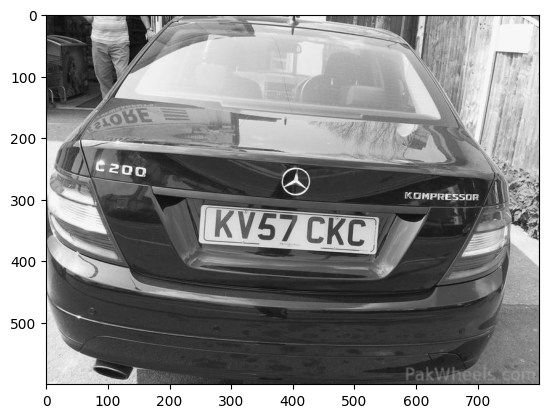

In [90]:
img = cv2.imread('/content/N241.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

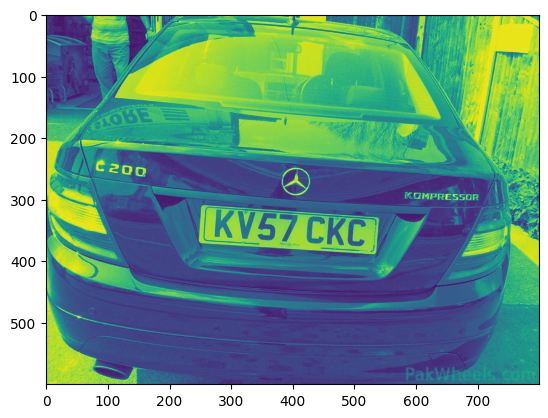

In [79]:
img = cv2.imread('/content/N241.jpeg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray)

## 2. Apply filter and find edges for localization

# `***1. Noise Reduction:***`

# `***bfilter = cv2.bilateralFilter(gray, 11, 17, 17):***`

***Function***: cv2.bilateralFilter: Applies a bilateral filter to reduce noise in the image represented by gray.

***Arguments***:
gray: The input grayscale image.
11: Diameter of the neighborhood considered for filtering (larger values process a wider area).
17: Spatial standard deviation (controls neighborhood influence).
17: Range standard deviation (controls intensity similarity for averaging).

***Output***: bfilter: The noise-reduced version of the grayscale image.


# `***2. Edge Detection:***`

# `***edged = cv2.Canny(bfilter, 30, 200):***`

***Function***: cv2.Canny: Identifies edges in the image.

***Arguments***:
bfilter: The noise-reduced image to process.
30: Lower threshold for edge intensity (intensities below this are ignored).
200: Upper threshold for edge intensity (weak edges below this are discarded).

***Output***: edged: An image with only strong edges highlighted.


# `***3. Image Visualization:***`

plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB)):

***Function***: plt.imshow (from the Matplotlib library): Displays an image.

***Argument***: edged: The edge-detected image (assumed to be grayscale).

***Conversion***: cv2.cvtColor(edged, cv2.COLOR_BGR2RGB): Converts the grayscale image to RGB format for display by Matplotlib (which expects RGB).


Overall, this code aims to:

1.Improve image quality by reducing noise using a bilateral filter.

2.Identify and highlight the important edges in the image using Canny edge detection.

3.Display the resulting edge-only image for visual inspection.

This is a common preprocessing step in many image processing tasks where clear edge information is crucial for further analysis or processing.




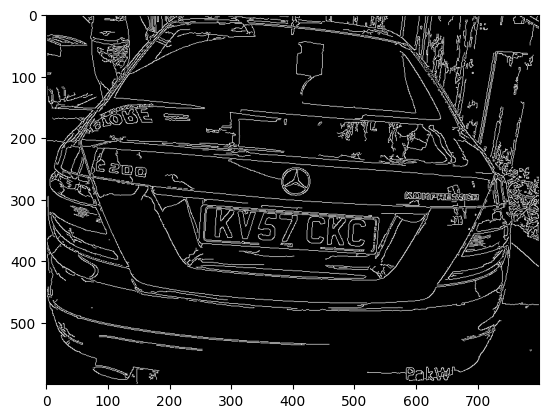

In [80]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged, cv2.COLOR_BGR2RGB))

## 3. Find Contours and Apply Mask

#1. keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE):

***Purpose***: Finds contours in a binary image.



***edged.copy()***: Creates a copy of the edged image (presumably containing edges), ensuring that the original image remains unmodified.

***cv2.RETR_TREE***: Retrieves contours in a hierarchical                                       tree-like structure (parent-child relationships).

***cv2.CHAIN_APPROX_SIMPLE***: Only stores essential points
                         for each contour, reducing data size and processing time.

***Return Value***: The keypoints variable holds a tuple
              containing two elements:

              The first element is a list of contours (outer contours followed by their nested child contours).

               The second element (not used here) is a hierarchy array describing the contour relationships.


#2. contours = imutils.grab_contours(keypoints):

Purpose: Extracts the contours from the keypoints tuple.
***imutils.grab_contours(keypoints)***: A convenience function from the imutils library (not part of OpenCV) that simplifies extracting contours.
***Return Value***: The contours variable now holds only the list of contours from the keypoints tuple (without the hierarchy information).

#3. contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]:

***Purpose***: Sorts the contours and selects the 10 largest ones.
***sorted(contours, key=cv2.contourArea, reverse=True)***: Sorts the list of contours in descending order of their area (using the cv2.contourArea function to calculate area).
***[:10]***: Extracts only the first 10 contours from the sorted list, selecting the largest ones.

***Overall Functionality***:

The code effectively:

1Finds contours in the provided edged image.

2Extracts the contours from the results and sorts them by area in descending order.
3Selects the 10 largest contours, which are often the most relevant objects or shapes in the image.

#Potential Applications:

1.Object detection and tracking
2.Shape recognition and analysis
3.Region of interest (ROI) selection
4.Segmentation tasks


***Example***:

Suppose you have an image containing multiple objects, and you want to identify the five largest ones. This code would find all contours, sort them by area, and select the top five, providing you with the desired information.

I hope this comprehensive explanation is helpful!

In [81]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

1. Initialization:

location = None: Initializes a variable location to store the coordinates of the quadrilateral (initially empty).

2. Iterating through Contours:for contour in contours: This loop iterates through each contour found in the contours list.

3. Shape Approximation:

approx = cv2.approxPolyDP(contour, 10, True):

Applies the cv2.approxPolyDP function to the current contour.

This function approximates the contour with a polygonal shape using the Douglas-Peucker algorithm.

The arguments:

contour: The input contour.

10: Epsilon value determining the level of approximation accuracy (smaller values create more accurate but complex approximations).
True: Indicates closed shape approximation (meaning the resulting polygon will connect its endpoints).

4. Quadrilateral Check:if len(approx) == 4:
Inside the loop, this condition checks if the approximated shape approx has 4 edges (indicating a quadrilateral).

5. Storing Location:location = approx: If the condition is met, the approximated quadrilateral coordinates are stored in the location variable.

6. Early Exit:break: The loop immediately terminates after finding a quadrilateral, avoiding unnecessary iterations.

In summary, this code aims to efficiently find the first quadrilateral shape encountered within a set of contours. It simplifies the contour to a polygon with fewer vertices while ensuring closedness, then checks for the specific number of edges (4) to identify the desired shape.

Potential Improvements:

Handle cases where no quadrilateral is found (currently location remains None).
Consider using a tolerance value instead of an exact match for len(approx) == 4 to account for approximation errors.
Experiment with different epsilon values in cv2.approxPolyDP to balance accuracy and efficiency based on your image characteristics.
I hope this explanation is helpful!

In [82]:
location = None
for contour in contours:
    approx = cv2.approxPolyDP(contour, 10, True)
    if len(approx) == 4:
        location = approx
        break

# `***Coordinates of a Quadrilateral***`:
 Based on the previous code you shared, ***location*** could potentially store the coordinates of a quadrilateral shape if one was found. The code iterated through contours, simplified them to quadrilaterals, and stored the first one in ***location***.

In [83]:
location

array([[[254, 302]],

       [[252, 378]],

       [[536, 385]],

       [[540, 331]]], dtype=int32)




# `***1. Creating a Mask***`:

***mask = np.zeros(gray.shape, np.uint8)***:

Creates a new NumPy array called ***mask*** filled with zeros.

The shape of the mask is the same as the ***gray*** image (likely a grayscale image).

The data type of the mask is 8-bit unsigned integer (***uint8***), suitable for representing black and white pixels.

# `***2. Drawing Contours on the Mask:***`

***new_image = cv2.drawContours(mask, [location], 0, 255, -1)***:

Draws a contour on the mask using the ***cv2.drawContours*** function.

***mask***: The mask array to draw on.

***[location]***: A list containing a single contour (likely the quadrilateral found earlier).

***0***: Contour color index (not relevant here as only a single color is used).

***255***: Contour color value (white, making the contour visible on the black mask).

***-1***: Thickness of the contour line (-1 fills the entire contour area).
The result is stored in a new variable new_image, but this is likely temporary as it's overwritten in the next step.

# `***3. Applying the Mask to the Original Image***`:



***new_image = cv2.bitwise_and(img, img, mask=mask)***:

Performs a bitwise AND operation between the original image (***img***) and itself, using the mask to control which pixels are kept.

***cv2.bitwise_and***: OpenCV function for bitwise operations.

***img***: The original image (likely a color image).

***img***: The same image used again for the operation.

***mask=mask***: The mask to apply during the operation.

The result is a new image ***new_image*** where only the pixels within the drawn contour are preserved from the original image.


***Overall Functionality***:

The code effectively isolates a specific region of interest (ROI) defined by a contour in an image. It achieves this by:

1.Creating a black mask with the same dimensions as the image.

2.Drawing the contour of interest on the mask, making it white.

3.Using the mask to filter the original image, keeping only the pixels within the contour and removing everything else.

This technique is commonly used in image processing tasks where you want to focus on a specific object or region in an image and discard the background.

In [84]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

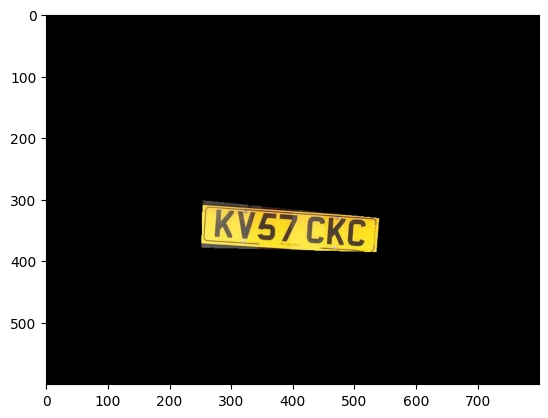

In [85]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [86]:
(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

The code you provided extracts a cropped region from a grayscale image based on a previously created mask. Here's a breakdown:

1. Finding Non-Zero Pixels:

(x, y) = np.where(mask==255):
Uses np.where to find the coordinates of all pixels in the mask that are equal to 255 (assuming white).
These pixels represent the region of interest (ROI) defined by the mask.

2. Calculating Boundaries:

(x1, y1) = (np.min(x), np.min(y)):
Finds the minimum x and y coordinates within the non-zero pixels, defining the top-left corner of the ROI.
(x2, y2) = (np.max(x), np.max(y)):
Finds the maximum x and y coordinates within the non-zero pixels, defining the bottom-right corner of the ROI.

3. Extracting Cropped Image:

cropped_image = gray[x1:x2+1, y1:y2+1]:
Uses slicing notation on the gray image (assuming it holds the grayscale data) to extract a sub-region bounded by the calculated coordinates.
The +1 in the slicing ensures that both the start and end indices are included in the selection.
Overall Functionality:

The code efficiently crops a rectangular region from a grayscale image based on a binary mask. It finds the boundaries of the region defined by non-zero pixels in the mask and then extracts the corresponding portion from the original image.

Potential Considerations:

Make sure the mask and gray images have the same dimensions and data types.
If the mask has multiple non-zero regions, this code will only extract the first one based on minimum/maximum coordinates. You might need adjustments if you want to handle multiple ROIs.
Consider error handling or checks to ensure the coordinates are within valid ranges for the image size.
I hope this explanation clarifies the purpose and functionality of the code!

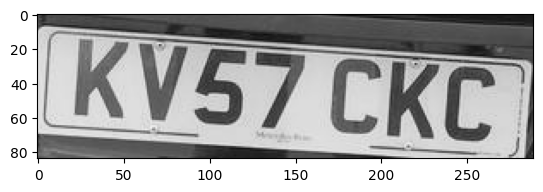

In [87]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

## 4. Use Easy OCR To Read Text

In [88]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

[([[10, 2], [279, 2], [279, 84], [10, 84]], 'KVSZCKC', 0.8001170096701142)]

The code you provided uses the easyocr library to perform text recognition on the previously cropped image. Here's a breakdown:

1. reader = easyocr.Reader(['en']):

This line initializes an easyocr reader object specifically trained for English language text recognition. You can pass other language codes in the list if needed.
2. result = reader.readtext(cropped_image):

This line feeds the cropped image (cropped_image) to the reader for text recognition. The output is stored in the result variable.
3. result:

This represents the result of the text recognition process. It's likely a Python list or dictionary containing information about the extracted text. The exact structure depends on the easyocr version and configuration.
However, as I cannot directly access code in my environment, I cannot provide the specific content of result. Some possibilities include:

A list of detected text regions, each containing bounding box coordinates and the recognized text string.
A dictionary with keys like "regions", "words", or "lines" holding related information.
To see the detailed contents of result, you can print it or use appropriate methods from the easyocr library to access its elements.

Overall, this code snippet effectively leverages easyocr to extract text from an image, allowing you to further process or analyze the recognized information.

I hope this explanation is helpful! Feel free to ask further questions if you have more information about the easyocr library version or the expected format of the result variable.

## 5. Render Result

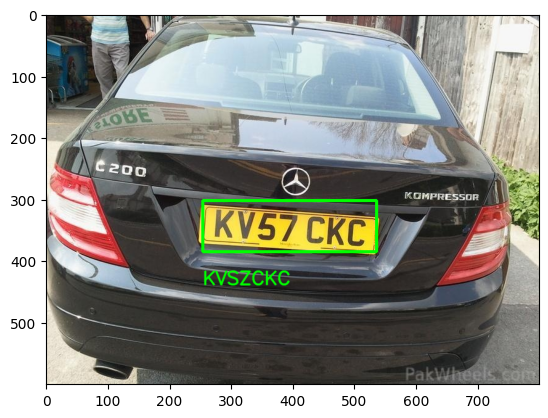

In [89]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))


This code segment is related to adding text and a rectangle to an image, presumably as part of a text recognition and object detection process. Let's break down the code:

1.Extracting Text Information:

python
Copy code
text = result[0][-2]
It seems that result is a variable containing the output of a text recognition process, perhaps using OCR.
result[0][-2] is extracting the recognized text from the result.

2.Setting Font and Adding Text to Image:

python
Copy code
font = cv2.FONT_HERSHEY_SIMPLEX

res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60), fontFace=font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)

cv2.FONT_HERSHEY_SIMPLEX is a font type.

cv2.putText is used to draw text on the image (img).

The text (text) is placed at the coordinates (approx[0][0][0], approx[1][0][1]+60) with the specified font properties (font scale, color, thickness, and line type).

3.Adding Rectangle to Image:

python
Copy code
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,255,0),3)
cv2.rectangle is used to draw a rectangle on the image (img).
The rectangle is defined by the coordinates of its top-left (approx[0][0]) and bottom-right (approx[2][0]) corners.
The color of the rectangle is set to (0,255,0) (green), and its thickness is set to 3.

4.Displaying the Result:

python
Copy code
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))
This line is using Matplotlib to display the image after adding the text and rectangle.
cv2.cvtColor(res, cv2.COLOR_BGR2RGB) is used to convert the image from the BGR color space (used by OpenCV) to RGB, which is the format expected by Matplotlib.
In summary, this code is taking the recognized text from the OCR result, adding it to the image along with a rectangle around the detected object, and then displaying the result using Matplotlib. The coordinates and appearance of the text and rectangle are based on the values obtained from the approx variable.




